<a href="https://colab.research.google.com/github/bchanyoo/NLP/blob/main/NLP%20Wikidocs_KaggleMovieRecSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('/content/sample_data/movies_metadata.csv', low_memory=False)
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [23]:
#상위 2만개의 샘플을 data에 저장

data = data.head(20000)

In [24]:
# TF-IDF 값 계산시에 Null값이 있으면 에러 발생.
# overview(요약) 열에 결측값에 해당하는 Null값 확인
# 추천시스템이기 때문에 요약 내용의 유사도를 구하기 때문임.

print('overview 열의 Null값 수', data['overview'].isnull().sum())

overview 열의 Null값 수 135


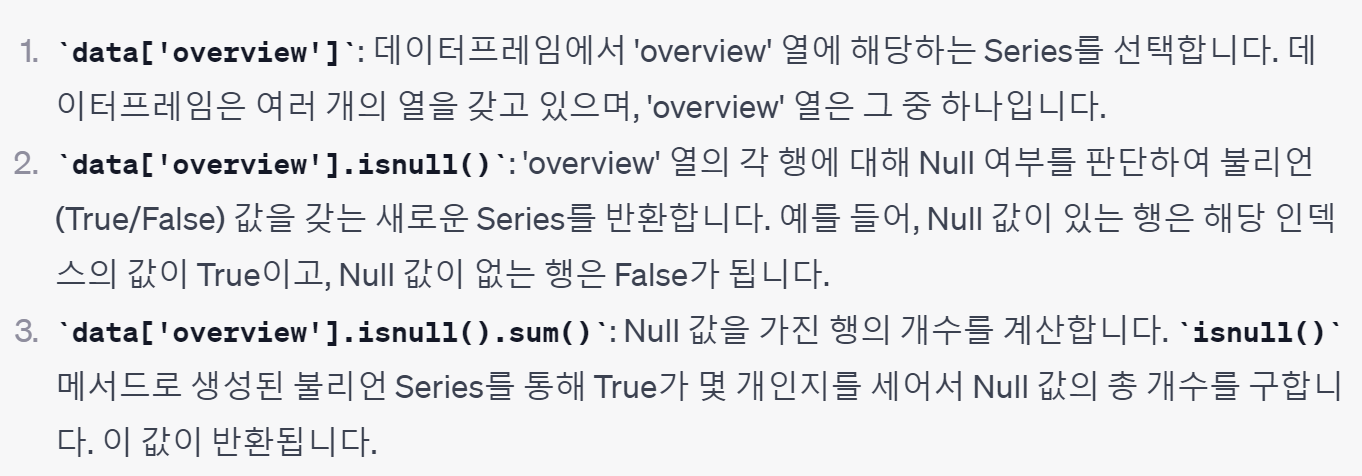

In [25]:
# Null(결측값) 제거하고 빈 값 넣기.
data['overview'] = data['overview'].fillna('')

<ipython-input-25-4d205bbf718a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['overview'] = data['overview'].fillna('')


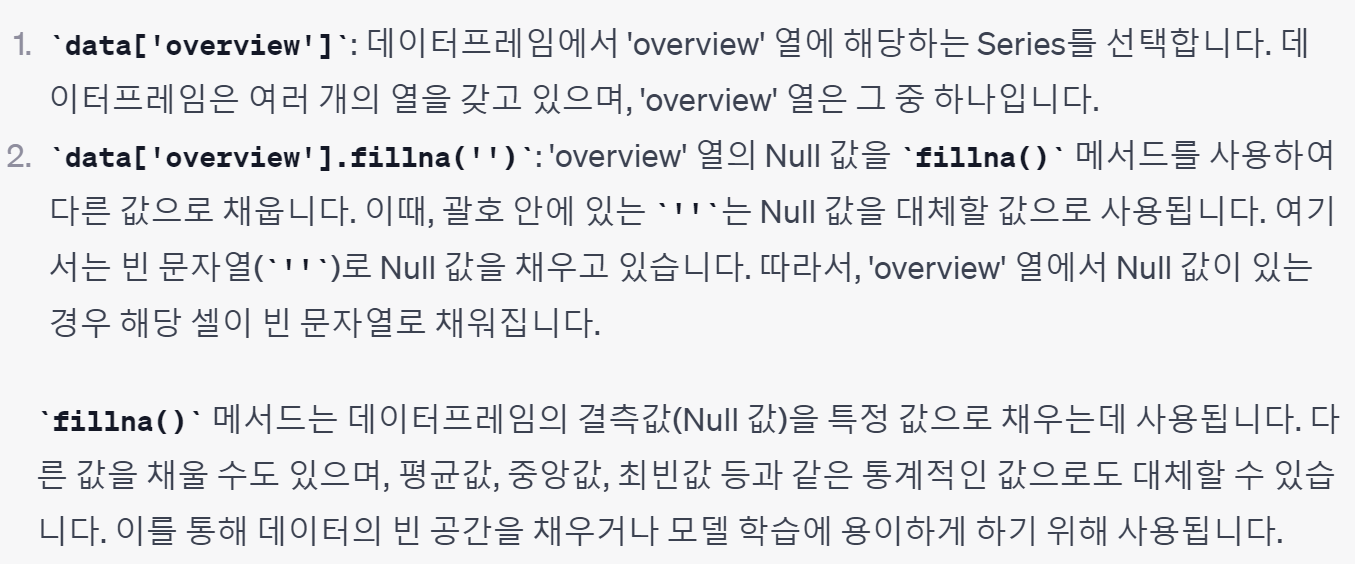

In [26]:
# 불용어 제거 후 TF-IDF 행렬 크기 구하기.

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('overview TF-IDF 행렬의 크기', tfidf_matrix.shape)

#2만개의 행, 47847개의 열
#2만개의 영화를 표현하기 위해 47847개의 단어가 사용됨.

overview TF-IDF 행렬의 크기 (20000, 47487)


In [27]:
#cosine 유사도 구하기

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 결과', cosine_sim.shape)

코사인 유사도 결과 (20000, 20000)


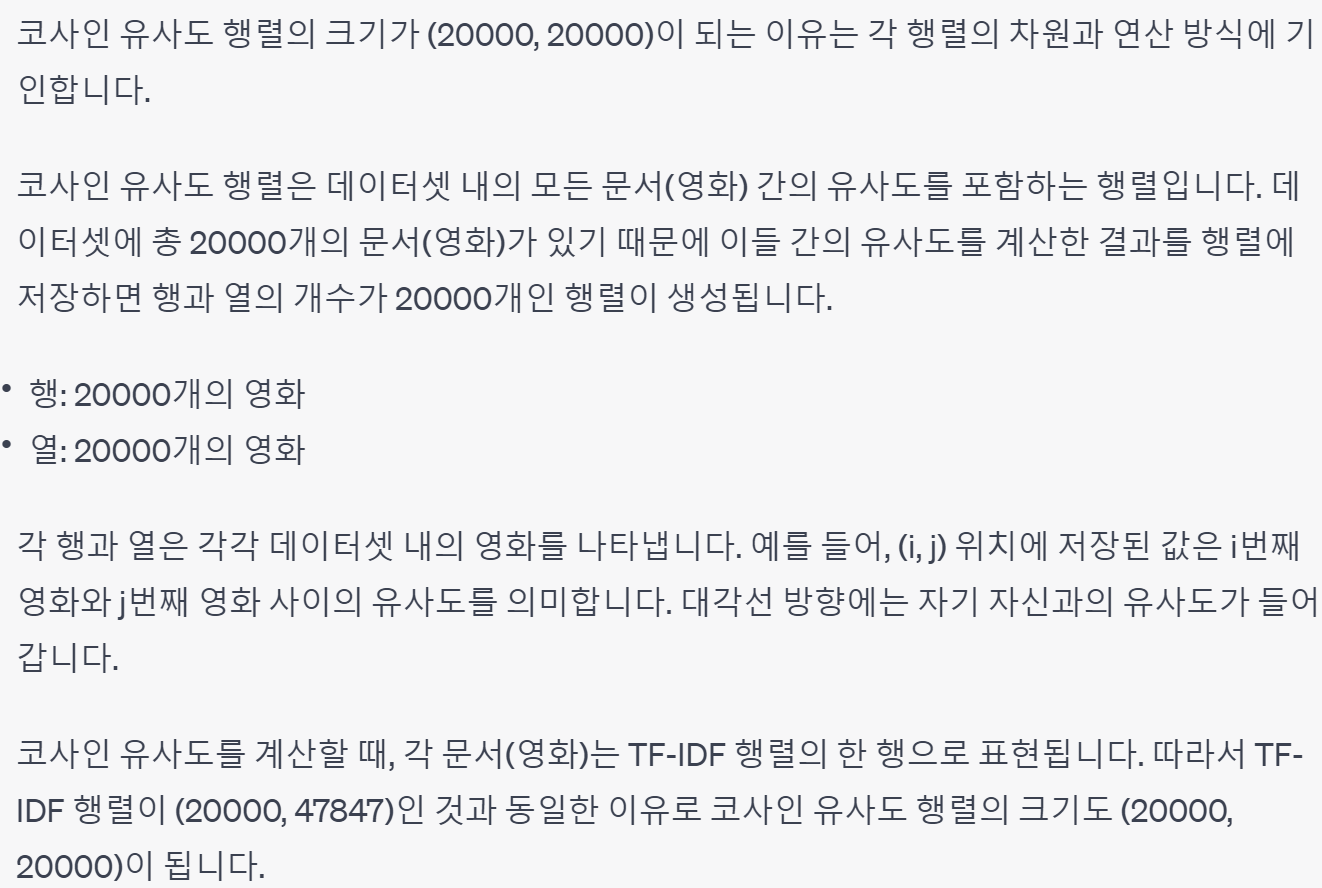

In [28]:
#영화의 title을 key, 영화의 index를 value로 하는 dictionary 생성

title_to_index = dict(zip(data['title'], data.index))

#영화 제목 Father of the Bride Part II의 인덱스를 리턴해보기
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


In [38]:
def get_recommendations(title, cosine_sim = cosine_sim):
  # 선택한 영화의 타이틀로부터 해당 영화의 index 받아오기
  idx = title_to_index[title]

  #해당 영화와 모든 영화와의 유사도를 가져온다
  sim_scores = list(enumerate(cosine_sim[idx]))

  #유사도에 따라 영화 정렬
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse = True) #x의 두번째 부분부터 정렬

  #가장 유사한 10개의 영화를 가져오기.
  sim_scores = sim_scores[1:11]

  #가장 유사한 10개 영화의 인덱스 얻기
  movie_indices = [idx[0] for idx in sim_scores]

  #가장 유사한 10개의 영화 제목 리턴
  return data['title'].iloc[movie_indices]

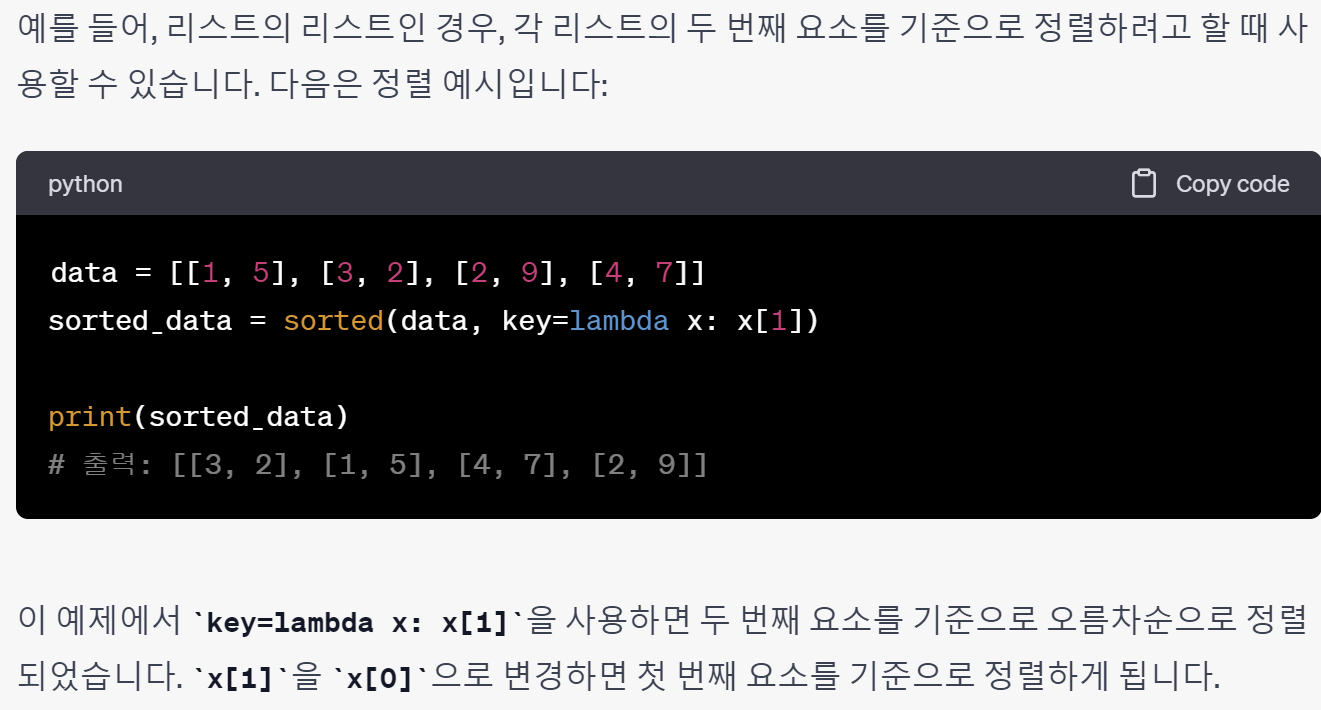
'================================================================================'
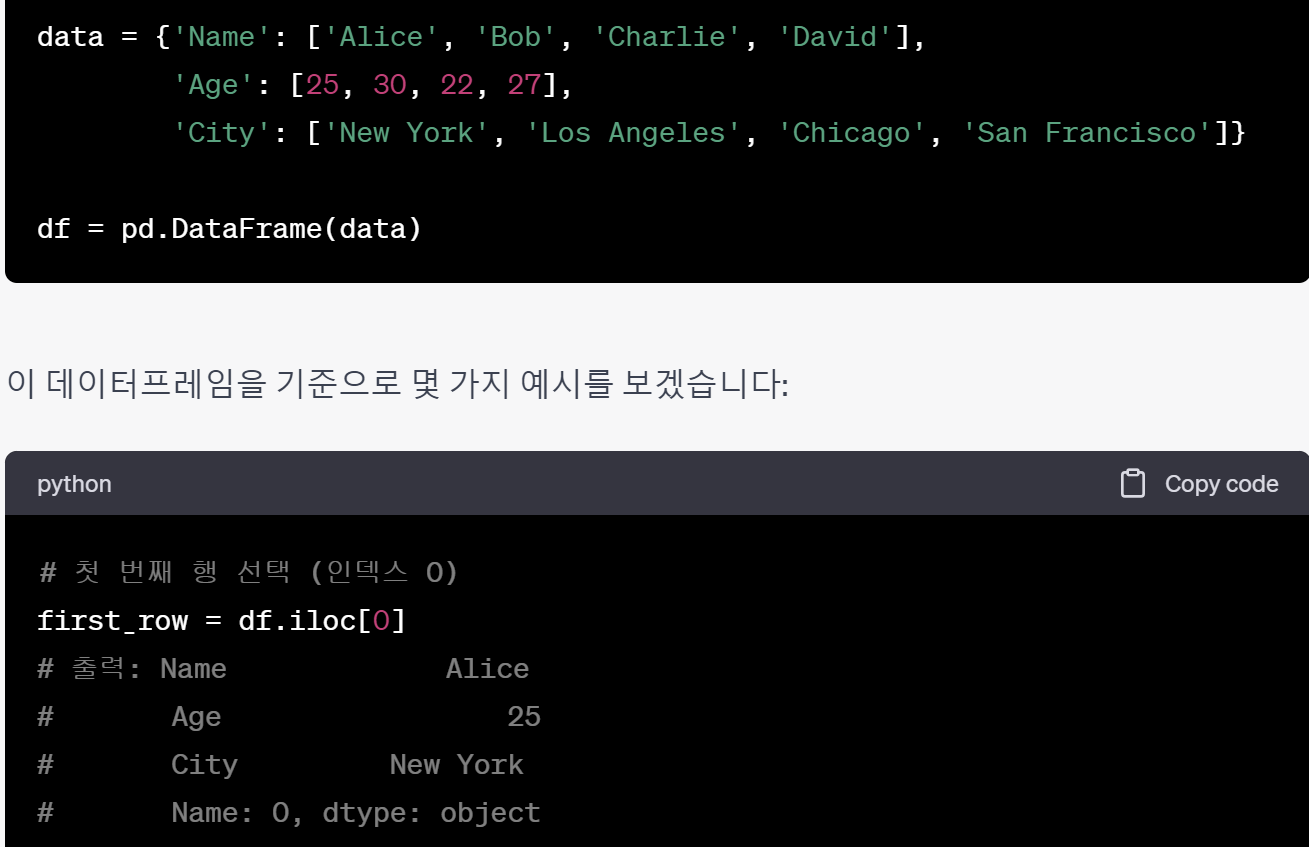

In [39]:
# 다크나이트 라이즈와 overview가 유사한 영화 찾아보기
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object